<a href="https://colab.research.google.com/github/icarorodolfo27/PremierLeague/blob/main/An%C3%A1lise_Premier_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando todas as bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Primeiro, carregamos o arquivo com os dados da temporada 20/21 da Premier League
EPL_stats = pd.read_csv('EPL_20_21.csv')

In [ ]:
# Visualizando as primeiras linhas do Data Frame
EPL_stats.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [ ]:
#Agrupando a quantidade de gols por equipes na temporada
sum_goals = EPL_stats.groupby('Club').Goals.sum()
sum_goals

Club
Arsenal                    53
Aston Villa                52
Brighton                   39
Burnley                    32
Chelsea                    56
Crystal Palace             39
Everton                    45
Fulham                     26
Leeds United               60
Leicester City             64
Liverpool FC               65
Manchester City            82
Manchester United          70
Newcastle United           44
Sheffield United           19
Southampton                47
Tottenham Hotspur          66
West Bromwich Albion       33
West Ham United            60
Wolverhampton Wanderers    34
Name: Goals, dtype: int64

In [ ]:
#Agrupando a expectativa de gols (que está em média por partida) por equipes na temporada
sum_xG = EPL_stats.groupby('Club').xG.sum()
sum_xG

Club
Arsenal                    3.66
Aston Villa                3.28
Brighton                   3.39
Burnley                    2.17
Chelsea                    3.70
Crystal Palace             1.62
Everton                    2.47
Fulham                     2.99
Leeds United               2.68
Leicester City             3.35
Liverpool FC               3.87
Manchester City            3.88
Manchester United          3.16
Newcastle United           2.65
Sheffield United           3.67
Southampton                2.37
Tottenham Hotspur          3.10
West Bromwich Albion       2.41
West Ham United            2.75
Wolverhampton Wanderers    3.10
Name: xG, dtype: float64

# Multiplicando a xG pela quantidade de "matches"

Como a xG está em média por partida, é necessário multiplicá-la pela quandidade de jogos

In [ ]:
#Selecionando as colunas que eu quero trabalhar
total_expected = EPL_stats[['Club', 'Goals', 'xG', 'Matches']].copy()
#df0 = df.groupby('Club').sum()
#df0.head()

In [ ]:
total_expected['Total_xG'] = df['xG'] * df['Matches']

total_expected.head()

,Club,Goals,xG,Matches,Total_xG
0,Chelsea,6,0.21,36,7.56
1,Chelsea,0,0.00,31,0.00
2,Chelsea,6,0.41,35,14.35
3,Chelsea,3,0.10,27,2.70
4,Chelsea,1,0.06,32,1.92


In [ ]:
#Somando a quantidade de gols e toda a xG por clubes
team_xG = df.groupby('Club').agg({'Total_xG': 'sum', 'Goals': 'sum'})
team_xG.head()

,Total_xG,Goals
Club,,
Arsenal,80.95,53
Aston Villa,71.69,52
Brighton,74.19,39
Burnley,53.53,32
Chelsea,91.11,56


In [ ]:
#Ordenando pelas equipes que mais marcaram gols

team_xG.sort_values(by='Goals', ascending=False)

,Total_xG,Goals
Club,,
Manchester City,94.09,82
Manchester United,79.41,70
Tottenham Hotspur,73.91,66
Liverpool FC,92.99,65
Leicester City,71.23,64
Leeds United,76.49,60
West Ham United,69.01,60
Chelsea,91.11,56
Arsenal,80.95,53


<AxesSubplot:xlabel='Goals', ylabel='Total_xG'>

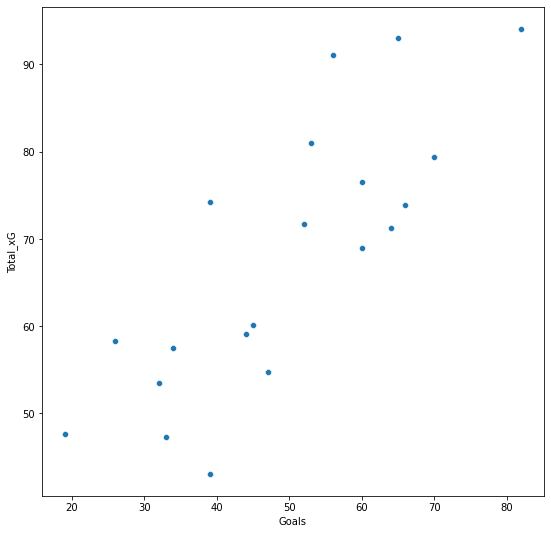

In [ ]:
#Plotando um gráfico de dispersão para verificar a tendência entre gols e xG
fig, ax = plt.subplots(figsize=(9, 9))

sns.scatterplot(x='Goals', y='Total_xG', data=team_xG) #O gráfico aponta uma tendência positiva 




In [ ]:
#
correlation = team_xG.corr()
correlation.style.background_gradient(cmap='RdBu')

,Total_xG,Goals
Total_xG,1.000000,0.804456
Goals,0.804456,1.000000


# Analisando individualmente a correlação entre gols e xG

In [ ]:
EPL_stats.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [ ]:
EPL_stats['Full_xG'] = EPL_stats['xG'] * EPL_stats['Matches']

<AxesSubplot:xlabel='Full_xG', ylabel='Goals'>

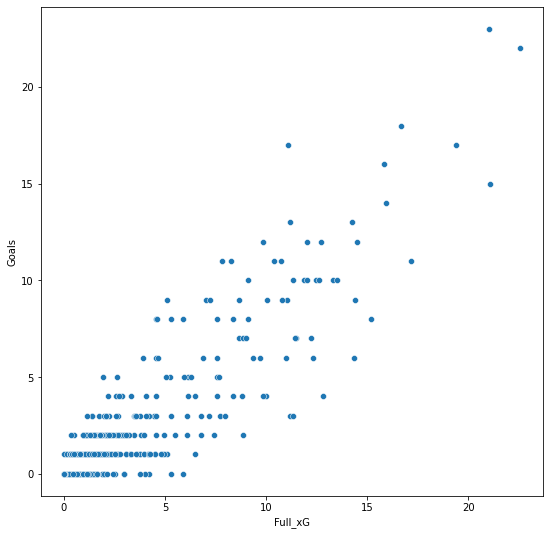

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.scatterplot(x='Full_xG', y='Goals', data=EPL_stats)

In [ ]:
cor = EPL_stats[['Goals', 'Full_xG']].corr()
cor.style.background_gradient(cmap='RdBu')

,Goals,Full_xG
Goals,1.000000,0.896202
Full_xG,0.896202,1.000000
